<a href="https://colab.research.google.com/github/Tercilio/Desafio4_ModeloRegressao/blob/main/Tercilio_Fonseca_desafio4_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 4 - Construindo um modelo de Regressão para :

### Aluno: Tercílio Fonseca

### 1°passo: Importando as bibliotecas que serao utilizadas no decorrer do desafio

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Etapas de Desenvolvimento

## 1) Etapa 01 - Análise Descritiva

### 1.1) 2° passo: Carregando o dataset e verificando os dados

In [ ]:
# Carregar os dados
df = pd.read_csv('MKT.csv')

In [ ]:
# Mostrar as primeiras linhas do dataset
print(df.head())

   youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88


In [ ]:
# Informações sobre o dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB
None


In [ ]:
# Estatísticas descritivas
print(df.describe())

          youtube    facebook   newspaper       sales
count  171.000000  171.000000  171.000000  171.000000
mean   178.021053   27.671579   35.240000   16.922807
std    102.449597   17.913532   24.902918    6.314608
min      0.840000    0.000000    0.360000    1.920000
25%     91.080000   11.700000   13.740000   12.540000
50%    179.760000   26.760000   31.080000   15.480000
75%    262.980000   43.680000   50.880000   20.820000
max    355.680000   59.520000  121.080000   32.400000


In [ ]:
# Verificar valores ausentes
print(df.isnull().sum())

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64


In [ ]:
# Verificar dados duplicados
print(df.duplicated().sum())

0


**# OBS: Como não há valores nulos, não há necessidadade de tratar.**

### 1.2) Distribuição das Variáveis:

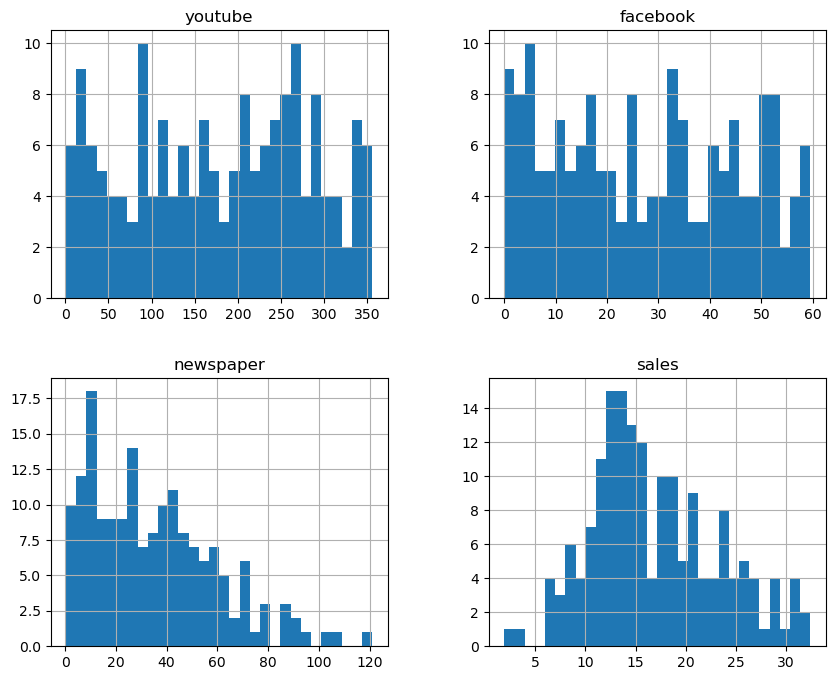

In [ ]:
# Histograma das variáveis
df.hist(bins=30, figsize=(10, 8))
plt.show()

## 2) Etapa 02 -Análise Exploratória

### 2.1. Análise de Correlação:
* A Matriz de Correlação e Mapa de Calor:
*
A A matriz de correlação mostra a força e a direção da relação entre cada par de variávei
* O mapa de calor facilita a visualização dessas correlações. Valores próximos de 1 ou -1 indicam forte correlação positiva ou negativa, respectivamente.te.

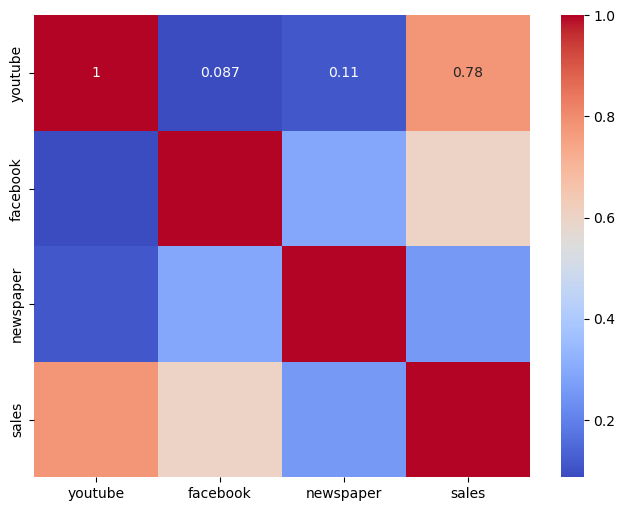

In [ ]:
# Matriz de correlação
correlation_matrix = df.corr()

# Mapa de calor da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 2.2. Visualizações Gráficas
*  scatter plots ajudam a visualizar a relação entre os investimentos em diferentes plataformas e as vendas. Podemos identificar tendências lineares ou não lineares e possíveis outliers.

*  O pairplot mostra todas as relações entre as variáveis em um único gráfico, facilitando a identificação de padrões gerais.

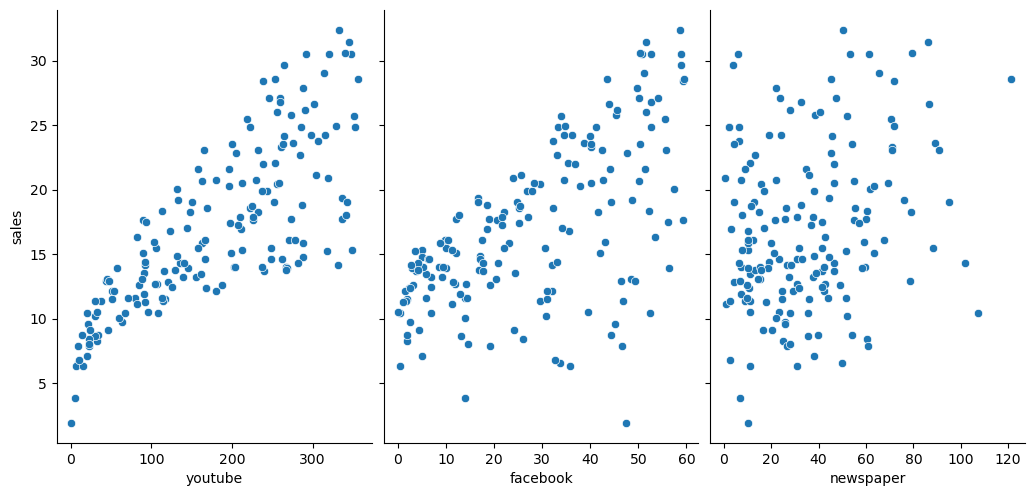

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

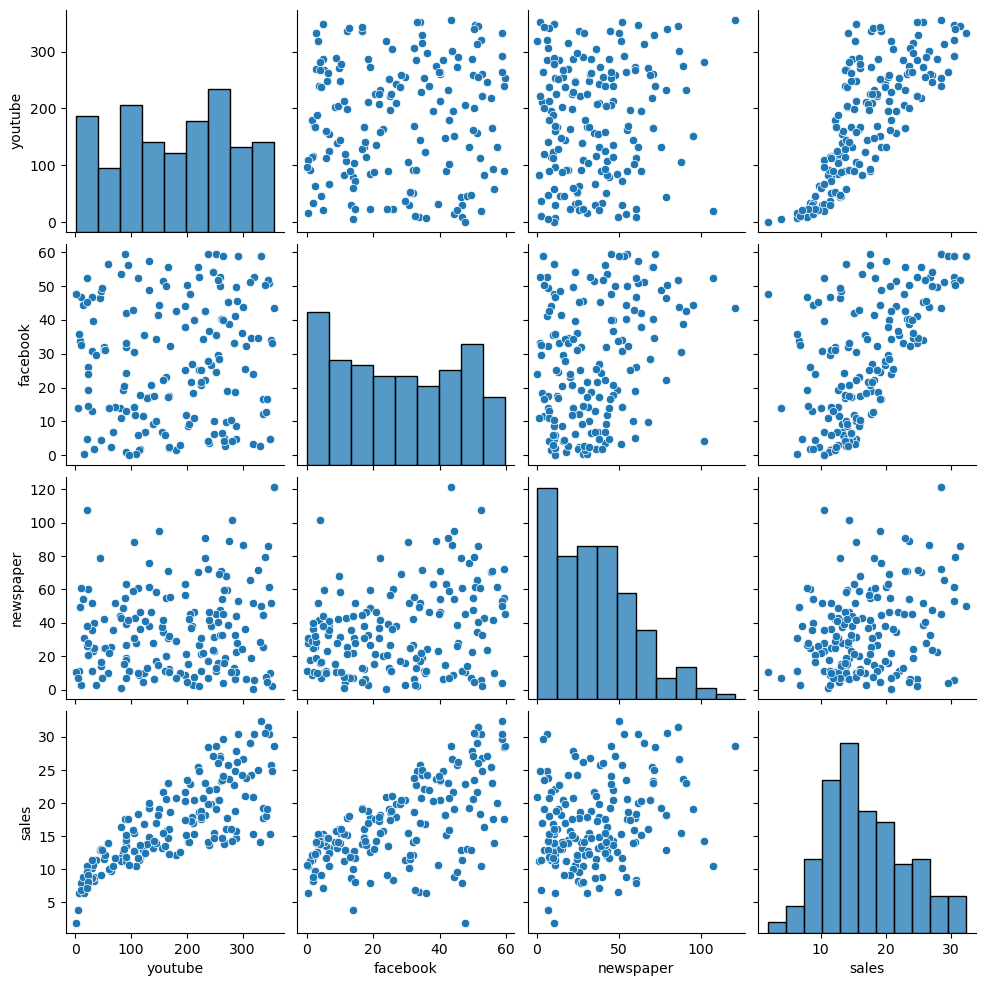

In [ ]:
# Scatter plot entre investimentos e vendas
sns.pairplot(df, x_vars=['youtube', 'facebook', 'newspaper'], y_vars='sales', height=5, aspect=0.7, kind='scatter')
plt.show()

# Pairplot para ver todas as relações
sns.pairplot(df)
plt.show()

### 2.3. Identificação de Outliers
* Os box plots ajudam a identificar outliers em cada variável. Outliers são pontos que se afastam significativamente dos outros dados e podem influenciar negativamente a modelagem.


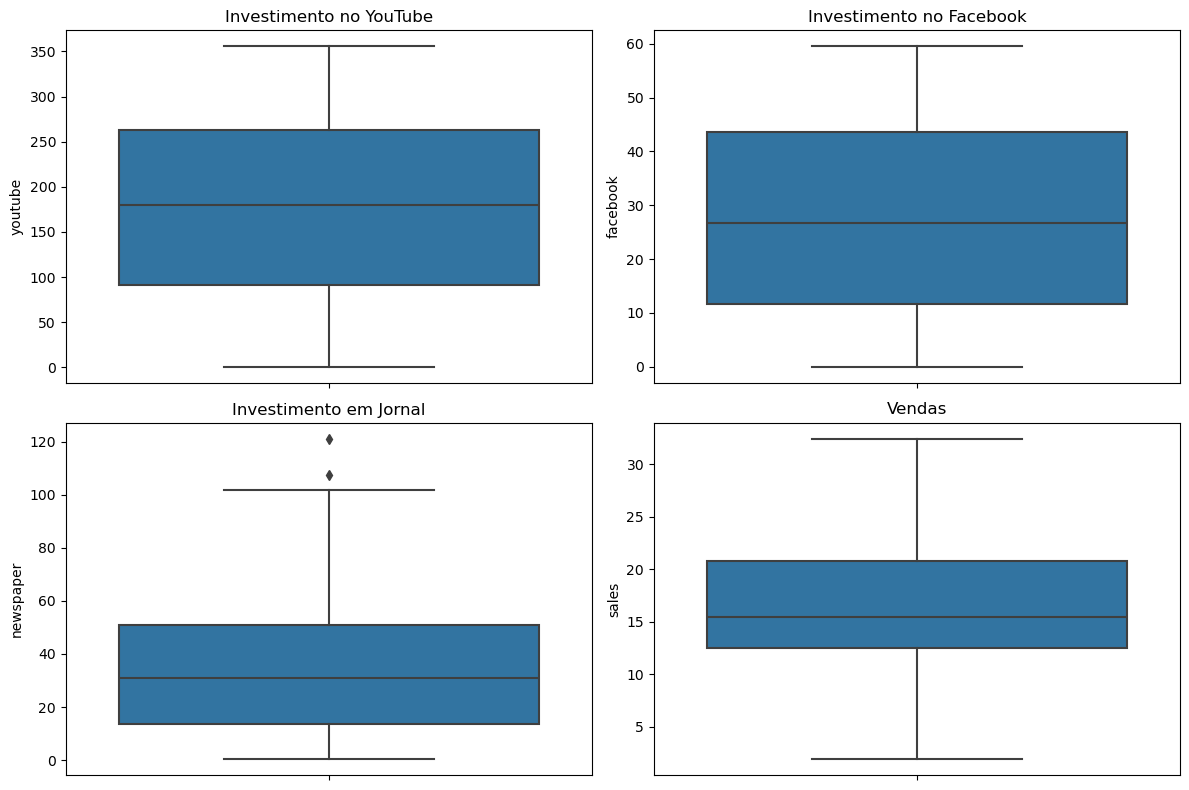

In [ ]:
# Box plots para identificar outliers
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(y=df['youtube'])
plt.title('Investimento no YouTube')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['facebook'])
plt.title('Investimento no Facebook')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['newspaper'])
plt.title('Investimento em Jornal')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['sales'])
plt.title('Vendas')

plt.tight_layout()
plt.show()


## 3) Etapa 03 - Modelagem
Para esta etapa, deve-se construir um modelo simples de regressão que permita a
previsão solicitada pela empresa, com base nos dados disponíveis. Para isto, importe
as bibliotecas necessárias e carregue os conjuntos de dados para iniciar a sua
construção!

In [ ]:
# Separar variáveis independentes (X) e dependente (y)
X = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']

In [ ]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Instanciar o modelo de regressão linear
model = LinearRegression();

# Treinar o modelo nos dados de treinamento
model.fit(X_train, y_train);

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 5.576790234026714
R-squared (R2): 0.872863085701216


## 4) Etapa 04 - Calculando predição

### 4.1 -  Definir Novos Investimentos

In [ ]:
# Definindo dados hipotéticos de investimento
new_investments = pd.DataFrame({
    'youtube': [150, 200, 250],
    'facebook': [20, 30, 40],
    'newspaper': [10, 20, 30]
})


### 4.2 -  Usar o modelo para fazer previsões com esses novos investimentos.

In [ ]:
# Fazer previsões com novos investimentos
new_sales_predictions = model.predict(new_investments)

# Adicionar as previsões ao DataFrame
new_investments['predicted_sales'] = new_sales_predictions

### 4.3 -  Apresentar os resultados das previsões.

In [ ]:
# Mostrar as previsões
print("Previsões de vendas para novos investimentos:")
print(new_investments)

Previsões de vendas para novos investimentos:
   youtube  facebook  newspaper  predicted_sales
0      150        20         10        14.220077
1      200        30         20        18.373701
2      250        40         30        22.527324
